In [1]:
import requests
import pandas as pd

def get_exchange_rates(start_date, end_date, base_currency, target_currency):
    url = "https://api.apilayer.com/exchangerates_data/timeseries"
    headers = {
        "apikey": "xG4VP7WvDuXtP5HxdzfyHmPw0rR4Ymza"
    }
    rates = {}
    year = pd.Timedelta(days=365)
    query_date = pd.to_datetime(end_date)
    while query_date >= pd.to_datetime(start_date):
        # Set the start and end dates for the current year
        current_year_start = (query_date - year).strftime('%Y-%m-%d')
        current_year_end = query_date.strftime('%Y-%m-%d')
        params = {'access_key': 'xG4VP7WvDuXtP5HxdzfyHmPw0rR4Ymza',
                  'start_date': current_year_start,
                  'end_date': current_year_end,
                  'base': base_currency,
                  'symbols': target_currency}
        try:
            response = requests.get(url, params=params, headers=headers)
            response.raise_for_status()
            data = response.json()
            rates.update(data['rates'])
        except requests.exceptions.RequestException as e:
            print("Error: ", e)
        query_date -= year
    # Create a DataFrame from the rates dictionary
    df = pd.DataFrame.from_dict(rates, orient='index')
    return df


In [12]:
start_date = '2013-12-31'
end_date = '2022-12-31'
base_currency = 'CNY'
target_currency = 'USD'
df_CNY = get_exchange_rates(start_date, end_date, base_currency, target_currency)

In [36]:
df_CNY.index = pd.to_datetime(df_CNY.index)

# Resample the DataFrame to monthly frequency and calculate the mean exchange rate for each month
monthly_average = df_CNY.resample('M').mean()

# Print the resulting DataFrame
monthly_average


,USD
2013-01-31,0.160396
2013-02-28,0.160114
2013-03-31,0.160488
2013-04-30,0.161311
2013-05-31,0.162514
...,...
2022-08-31,0.147059
2022-09-30,0.142712
2022-10-31,0.139092
2022-11-30,0.139558


In [50]:
monthly_average1= monthly_average.reset_index(drop=False)
monthly_average1

,index,USD
0,2013-01-31,0.16039596666666667
1,2013-02-28,0.16011375
2,2013-03-31,0.16048809677419357
3,2013-04-30,0.16131136666666668
4,2013-05-31,0.162514
...,...,...
115,2022-08-31,0.14705851612903226
116,2022-09-30,0.1427123
117,2022-10-31,0.1390922258064516
118,2022-11-30,0.13955820000000002


In [62]:
monthly_average1.to_excel("CNY.xlsx")

In [67]:
df_CNY1=pd.read_excel('CNY.xlsx')


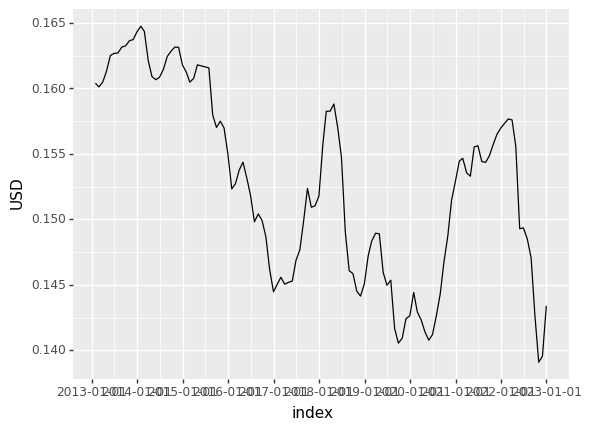

<ggplot: (8776120251597)>

In [68]:
from plotnine import *

g = ggplot (data=df_CNY1, mapping=aes(x='index', y='USD')) + geom_line() 

g

In [4]:
start_date = '2013-12-31'
end_date = '2022-12-31'
base_currency = 'JPY'
target_currency = 'USD'
df_JPY = get_exchange_rates(start_date, end_date, base_currency, target_currency)

In [ ]:
start_date = '2013-12-31'
end_date = '2022-12-31'
base_currency = 'EUR'
target_currency = 'USD'
df_EUR = get_exchange_rates(start_date, end_date, base_currency, target_currency)

In [ ]:
start_date = '2013-12-31'
end_date = '2022-12-31'
base_currency = 'GBP'
target_currency = 'USD'
df_GBP = get_exchange_rates(start_date, end_date, base_currency, target_currency)

In [ ]:
start_date = '2013-12-31'
end_date = '2022-12-31'
base_currency = 'INR'
target_currency = 'USD'
df_INR = get_exchange_rates(start_date, end_date, base_currency, target_currency)

In [ ]:
start_date = '2013-12-31'
end_date = '2022-12-31'
base_currency = 'CAD'
target_currency = 'USD'
df_CAD = get_exchange_rates(start_date, end_date, base_currency, target_currency)

In [ ]:
start_date = '2013-12-31'
end_date = '2022-12-31'
base_currency = 'KRW'
target_currency = 'USD'
df_KRW = get_exchange_rates(start_date, end_date, base_currency, target_currency)

In [ ]:
start_date = '2013-12-31'
end_date = '2022-12-31'
base_currency = 'RUB'
target_currency = 'USD'
df_RUB= get_exchange_rates(start_date, end_date, base_currency, target_currency)